# An example of using SVM in classification of the iris dataset

## Preprocessing

In [125]:
# import the required libraries
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [129]:
# read in the raw dataset
iris = datasets.load_iris()

# convert it to a dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# clean the dataset 

# fix the class label feature problem
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# rename the features
iris_df = iris_df.rename(columns={
    "sepal length (cm)" : "sepal_length_cm",
    "sepal width (cm)"  : "sepal_width_cm" ,
    "petal length (cm)" : "petal_length_cm",
    "petal width (cm)"  : "petal_width_cm"
})


In [130]:
# view the dataframe
iris_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [137]:
# view the layout of the dataset

result = {}
target_labels = iris['target_names'].tolist()

for target in target_labels:
    result[target] = -1

for index, obs in enumerate(iris_df.values):
    if result[obs[-1]] == -1:
        result[obs[-1]] = index
result

{'setosa': 0, 'versicolor': 50, 'virginica': 100}

In [91]:
# Since the dataset has 3 classes, we will remove one class so we can have a binary classification problem

# remove 'virginica'
rows = list(range(100,150))
iris_df = iris_df.drop(iris_df.index[rows])

In [92]:
iris_df.iloc[[49]]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,species
49,5.0,3.3,1.4,0.2,0.0,setosa


In [93]:
iris_df.iloc[[50]]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,species
50,7.0,3.2,4.7,1.4,1.0,versicolor


Now we have 2 classes to classify the given observations to: `setosa` and `versicolor`. With each class having 50 observations in total

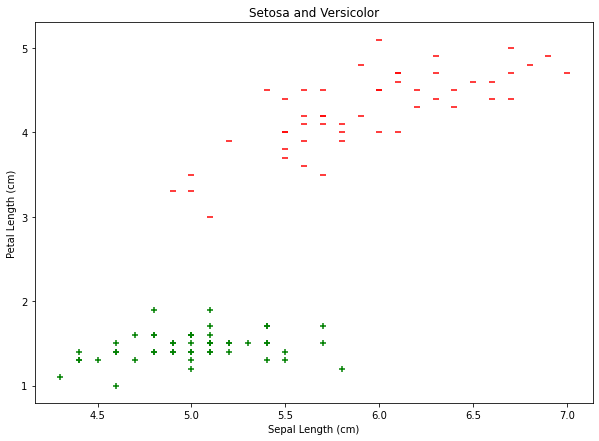

In [94]:
# visualize the current state of our dataset

x_data = iris_df['sepal_length_cm']
y_data = iris_df['petal_length_cm']

setosa_x = x_data[:50]
setosa_y = y_data[:50]

versicolor_x = x_data[50:]
versicolor_y = y_data[50:]

# create the figure
plt.figure(figsize=(10,7))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')

plt.title("Setosa and Versicolor")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show()

## Building the SVM model

In [95]:
# split the data into training and testing sets
y = iris_df["target"]

iris_df.drop(["target", "species", "sepal_width_cm", "petal_width_cm"], axis=1, inplace=True)

X = iris_df.values.tolist()
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
# build the model
# initialize the Support Vector Classifcation model
svc_clf = SVC(kernel='linear')
# train the model on our dataset
svc_clf.fit(X_train,y_train)
# store the predictions of the model
y_pred = svc_clf.predict(X_test)
# evaluate the model on accuracy
print(accuracy_score(y_test,y_pred))

1.0


Accuracy is 1 (100%). Now lets see how our SVM model is actually classifiying them

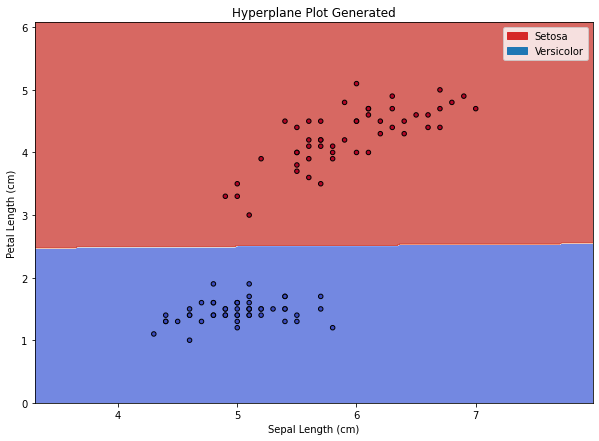

In [143]:
# output the hyperplane generated
# helpful functions in plotting the hyperplane figure
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# create the figure
fig, ax = plt.subplots(figsize=(10, 7))

# Set-up grid for plotting.
X = np.array(X)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svc_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel("Petal Length (cm)")
ax.set_xlabel("Sepal Length (cm)")
ax.set_title("Hyperplane Plot Generated")

# configure the legend manually
red_patch = mpatches.Patch(color='tab:red', label='Setosa')
blue_patch = mpatches.Patch(color='tab:blue', label='Versicolor')
ax.legend(handles=[red_patch, blue_patch])

plt.show();